IMPORTING PACKAGES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

IMPORTING DATASET

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/finalheart.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


VARIABLE DESCRIPTION

In [ ]:
df.shape

(319795, 18)

In [ ]:
df.index

RangeIndex(start=0, stop=319795, step=1)

In [ ]:
df.ndim

2

In [ ]:
df.size

5756310

In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

As we can see they are 18 varibales total
1) HeartDisease : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
2)BMI : Body Mass Index (BMI).
3)smoking : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).
4)AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
5)Stroke : did u get any  stroke?
6)PhysicalHealth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
7)MentalHealth : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
8)DiffWalking : Do you have serious difficulty walking or climbing stairs?
9)Sex : Are you male or female?
10)AgeCategory: Fourteen-level age category.
11)Race : Imputed race/ethnicity value.
12)Diabetic : (Ever told) (you had) diabetes?
13)PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
14)GenHealth : Would you say that in general your health is...
15)SleepTime : On average, how many hours of sleep do you get in a 24-hour period?
16)Asthma : (Ever told) (you had) asthma?
17)KidneyDisease : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
18)SkinCancer : (Ever told) (you had) skin cancer?

independent variables are= BMI	,Smoking	,AlcoholDrinking	,Stroke	PhysicalHealth,	MentalHealth	,DiffWalking	,Sex	,AgeCategory,	Race,	Diabetic	,PhysicalActivity,	GenHealth,	SleepTime	,Asthma,	KidneyDisease	,SkinCancer.
dependent variable is Heart disease 

In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
df.sample()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
184216,No,20.6,Yes,No,No,0.0,0.0,No,Female,30-34,White,No,Yes,Good,7.0,No,No,No


In [ ]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [ ]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [ ]:
df.count()

HeartDisease        319795
BMI                 319795
Smoking             319795
AlcoholDrinking     319795
Stroke              319795
PhysicalHealth      319795
MentalHealth        319795
DiffWalking         319795
Sex                 319795
AgeCategory         319795
Race                319795
Diabetic            319795
PhysicalActivity    319795
GenHealth           319795
SleepTime           319795
Asthma              319795
KidneyDisease       319795
SkinCancer          319795
dtype: int64

In [ ]:
df.memory_usage()

Index                   128
HeartDisease        2558360
BMI                 2558360
Smoking             2558360
AlcoholDrinking     2558360
Stroke              2558360
PhysicalHealth      2558360
MentalHealth        2558360
DiffWalking         2558360
Sex                 2558360
AgeCategory         2558360
Race                2558360
Diabetic            2558360
PhysicalActivity    2558360
GenHealth           2558360
SleepTime           2558360
Asthma              2558360
KidneyDisease       2558360
SkinCancer          2558360
dtype: int64

In [ ]:
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


As  most of the variables are of string type it is unable to draft the correlation between all the variables 

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
319790    False
319791    False
319792    False
319793    False
319794    False
Length: 319795, dtype: bool

In [ ]:
df.Sex.value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

In [ ]:
df.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [ ]:
df.Smoking.value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

In [ ]:
df.AlcoholDrinking.value_counts()

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

In [ ]:
df.Stroke.value_counts()

No     307726
Yes     12069
Name: Stroke, dtype: int64

In [ ]:
df.DiffWalking.value_counts()

No     275385
Yes     44410
Name: DiffWalking, dtype: int64

In [ ]:
df.AgeCategory.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [ ]:
df.Asthma.value_counts()

No     276923
Yes     42872
Name: Asthma, dtype: int64

In [ ]:
df.Race.value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [ ]:
df.Diabetic.value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [ ]:
df.PhysicalActivity.value_counts()

Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64

In [ ]:
df.GenHealth.value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [ ]:
df.KidneyDisease.value_counts()

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64

In [ ]:
df.SkinCancer.value_counts()

No     289976
Yes     29819
Name: SkinCancer, dtype: int64

In [ ]:
LE= preprocessing.LabelEncoder()
df.HeartDisease = LE.fit_transform(df.HeartDisease)
df.Smoking= LE.fit_transform(df.Smoking)
df.AlcoholDrinking= LE.fit_transform(df.AlcoholDrinking)
df.Stroke= LE.fit_transform(df.Stroke)
df.DiffWalking=LE.fit_transform(df.DiffWalking)
df.Sex=LE.fit_transform(df.Sex)
df.AgeCategory=LE.fit_transform(df.AgeCategory)
df.Race=LE.fit_transform(df.Race)
df.Sex=LE.fit_transform(df.Sex)
df.Diabetic=LE.fit_transform(df.Diabetic)
df.GenHealth=LE.fit_transform(df.GenHealth)
df.Asthma=LE.fit_transform(df.Asthma)
df.PhysicalActivity=LE.fit_transform(df.PhysicalActivity)
df.KidneyDisease=LE.fit_transform(df.KidneyDisease)
df.SkinCancer=LE.fit_transform(df.SkinCancer)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


So most of the variables are of object type (string) it will be a problem to draft the graphs and also while traing the model.
therefore by using LabelEncoder we have converted the string type to integer type. we can draft correlation,p[lot graphs and we can train the model  

In [ ]:
df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


it will be a difficult task to analaysis the correlation through above data
by plotting graphs or sorting the correlation 

In [ ]:
correlation_matrix = df.corr()
correlation_matrix['HeartDisease'].sort_values(ascending = False)

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64

To analaysis the correlation we have sorted the data 
to get more detail analaysis we need to plot graphs 

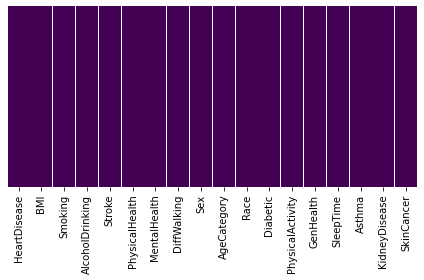

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

No null values

Data Visualization

UNIVARIENT ANALYSIS
explores the distribution of each variable in a data set.

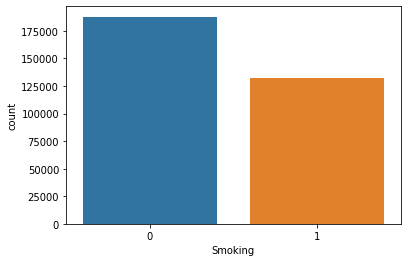

In [ ]:
sns.countplot(x='Smoking',data=df)

Smoking have 2 classes .In that 
       0 class->the count is more that 175000 ,
       1 class->the count is also near to 125000

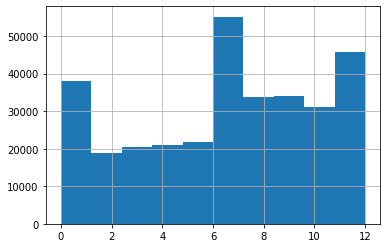

In [ ]:
df.AgeCategory.hist()

Observation:
➔ In this dataset the age group have 13 different classes.
➔ 40-44,45-49,........,70-74,75-79,80 and above ,are the classes with the difference of 5 
between each.

In [ ]:
df.AgeCategory.value_counts()

9     34151
8     33686
10    31065
7     29757
6     25382
12    24153
5     21791
11    21482
0     21064
4     21006
3     20550
2     18753
1     16955
Name: AgeCategory, dtype: int64

Agecategory contains 13 different class 

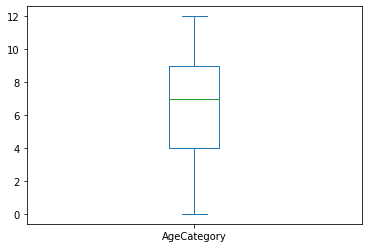

In [ ]:
df.AgeCategory.plot.box()

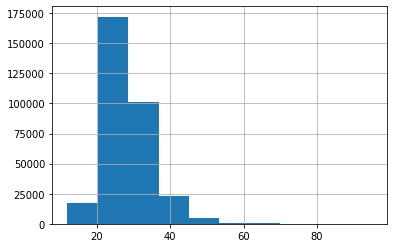

In [ ]:
df.BMI.hist()

Observation:
➔ BMI have records range from 0.0 to 70.0.
➔ Most of the records are between 20.0 to 25.0 range.
➔ 50.0 to 70.0 there are very less no.of records.

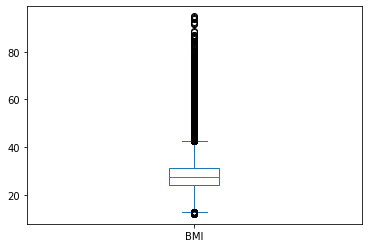

In [ ]:
df.BMI.plot.box()

Observation:
➔ 40.0 to 70.0 are the outliers but we should remove them because it is the health related data.
➔ Boxplot is mainly used for outlier detection

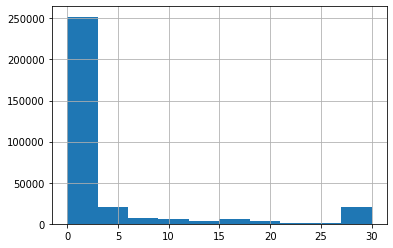

In [ ]:
df.PhysicalHealth.hist()

In the dataset the values of physical health range is 0.0 to 30.0
➔ We can observe most of the values are between 0.0 to 0.5 and almost of 250000 records 
are in this range only

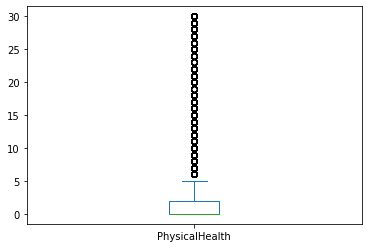

In [ ]:
df.PhysicalHealth.plot.box()

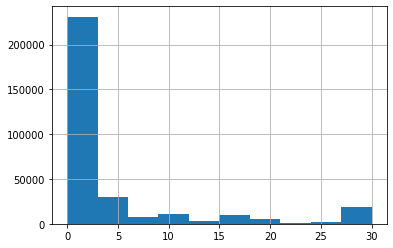

In [ ]:
df.MentalHealth.hist()

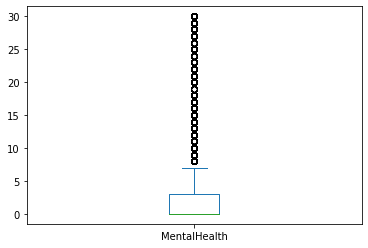

In [ ]:
df.MentalHealth.plot.box()

most of the outliars are in mentalhealth, physical health variables 
by the data from box plot

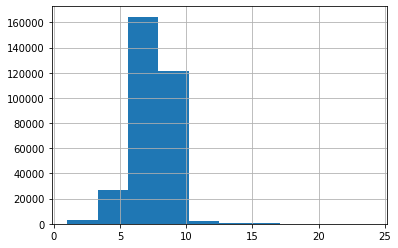

In [ ]:
df.SleepTime.hist()

Observation:
➔ SleepTime values ranges from 0.0 to 20.0 most of the values are between 5.0 to 10.0
➔ Almost of the records between are above 160000 above.

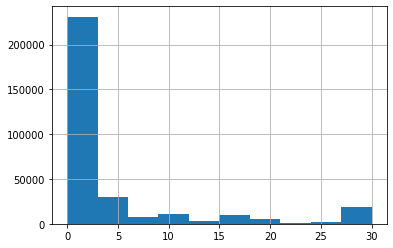

In [ ]:
df.MentalHealth.hist()

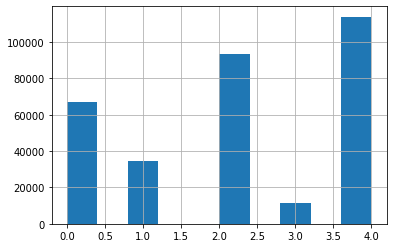

In [ ]:
df.GenHealth.hist()

In GenHealth variable there are 5 different classes in that very good have above 100000 
values, Good have above 90000 values, Excellent have above 60000 values.
Fair have above 30000, poor have above 10000 values.

BI VARIENT ANALYSIS
Describes the relationship that exists between two variables

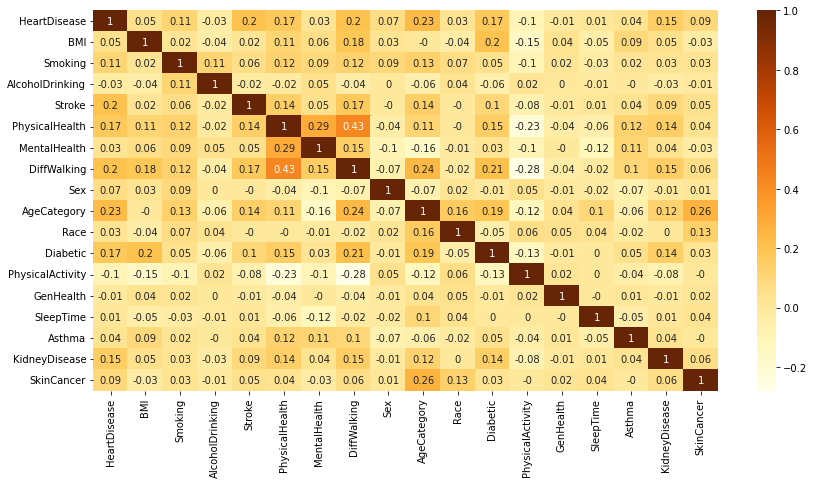

In [ ]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

observation
        Positive  
        -> diffwalking and phyiscalhealth have high correlation of 0.43
        ->2nd highest is mentalhealth and physicalhealth of correlation 0.29
        Negative 
        ->phyiscalactivity and diffwalking is -0.28
  ->For better performance of the model we need both positive and negative correlatted variabels

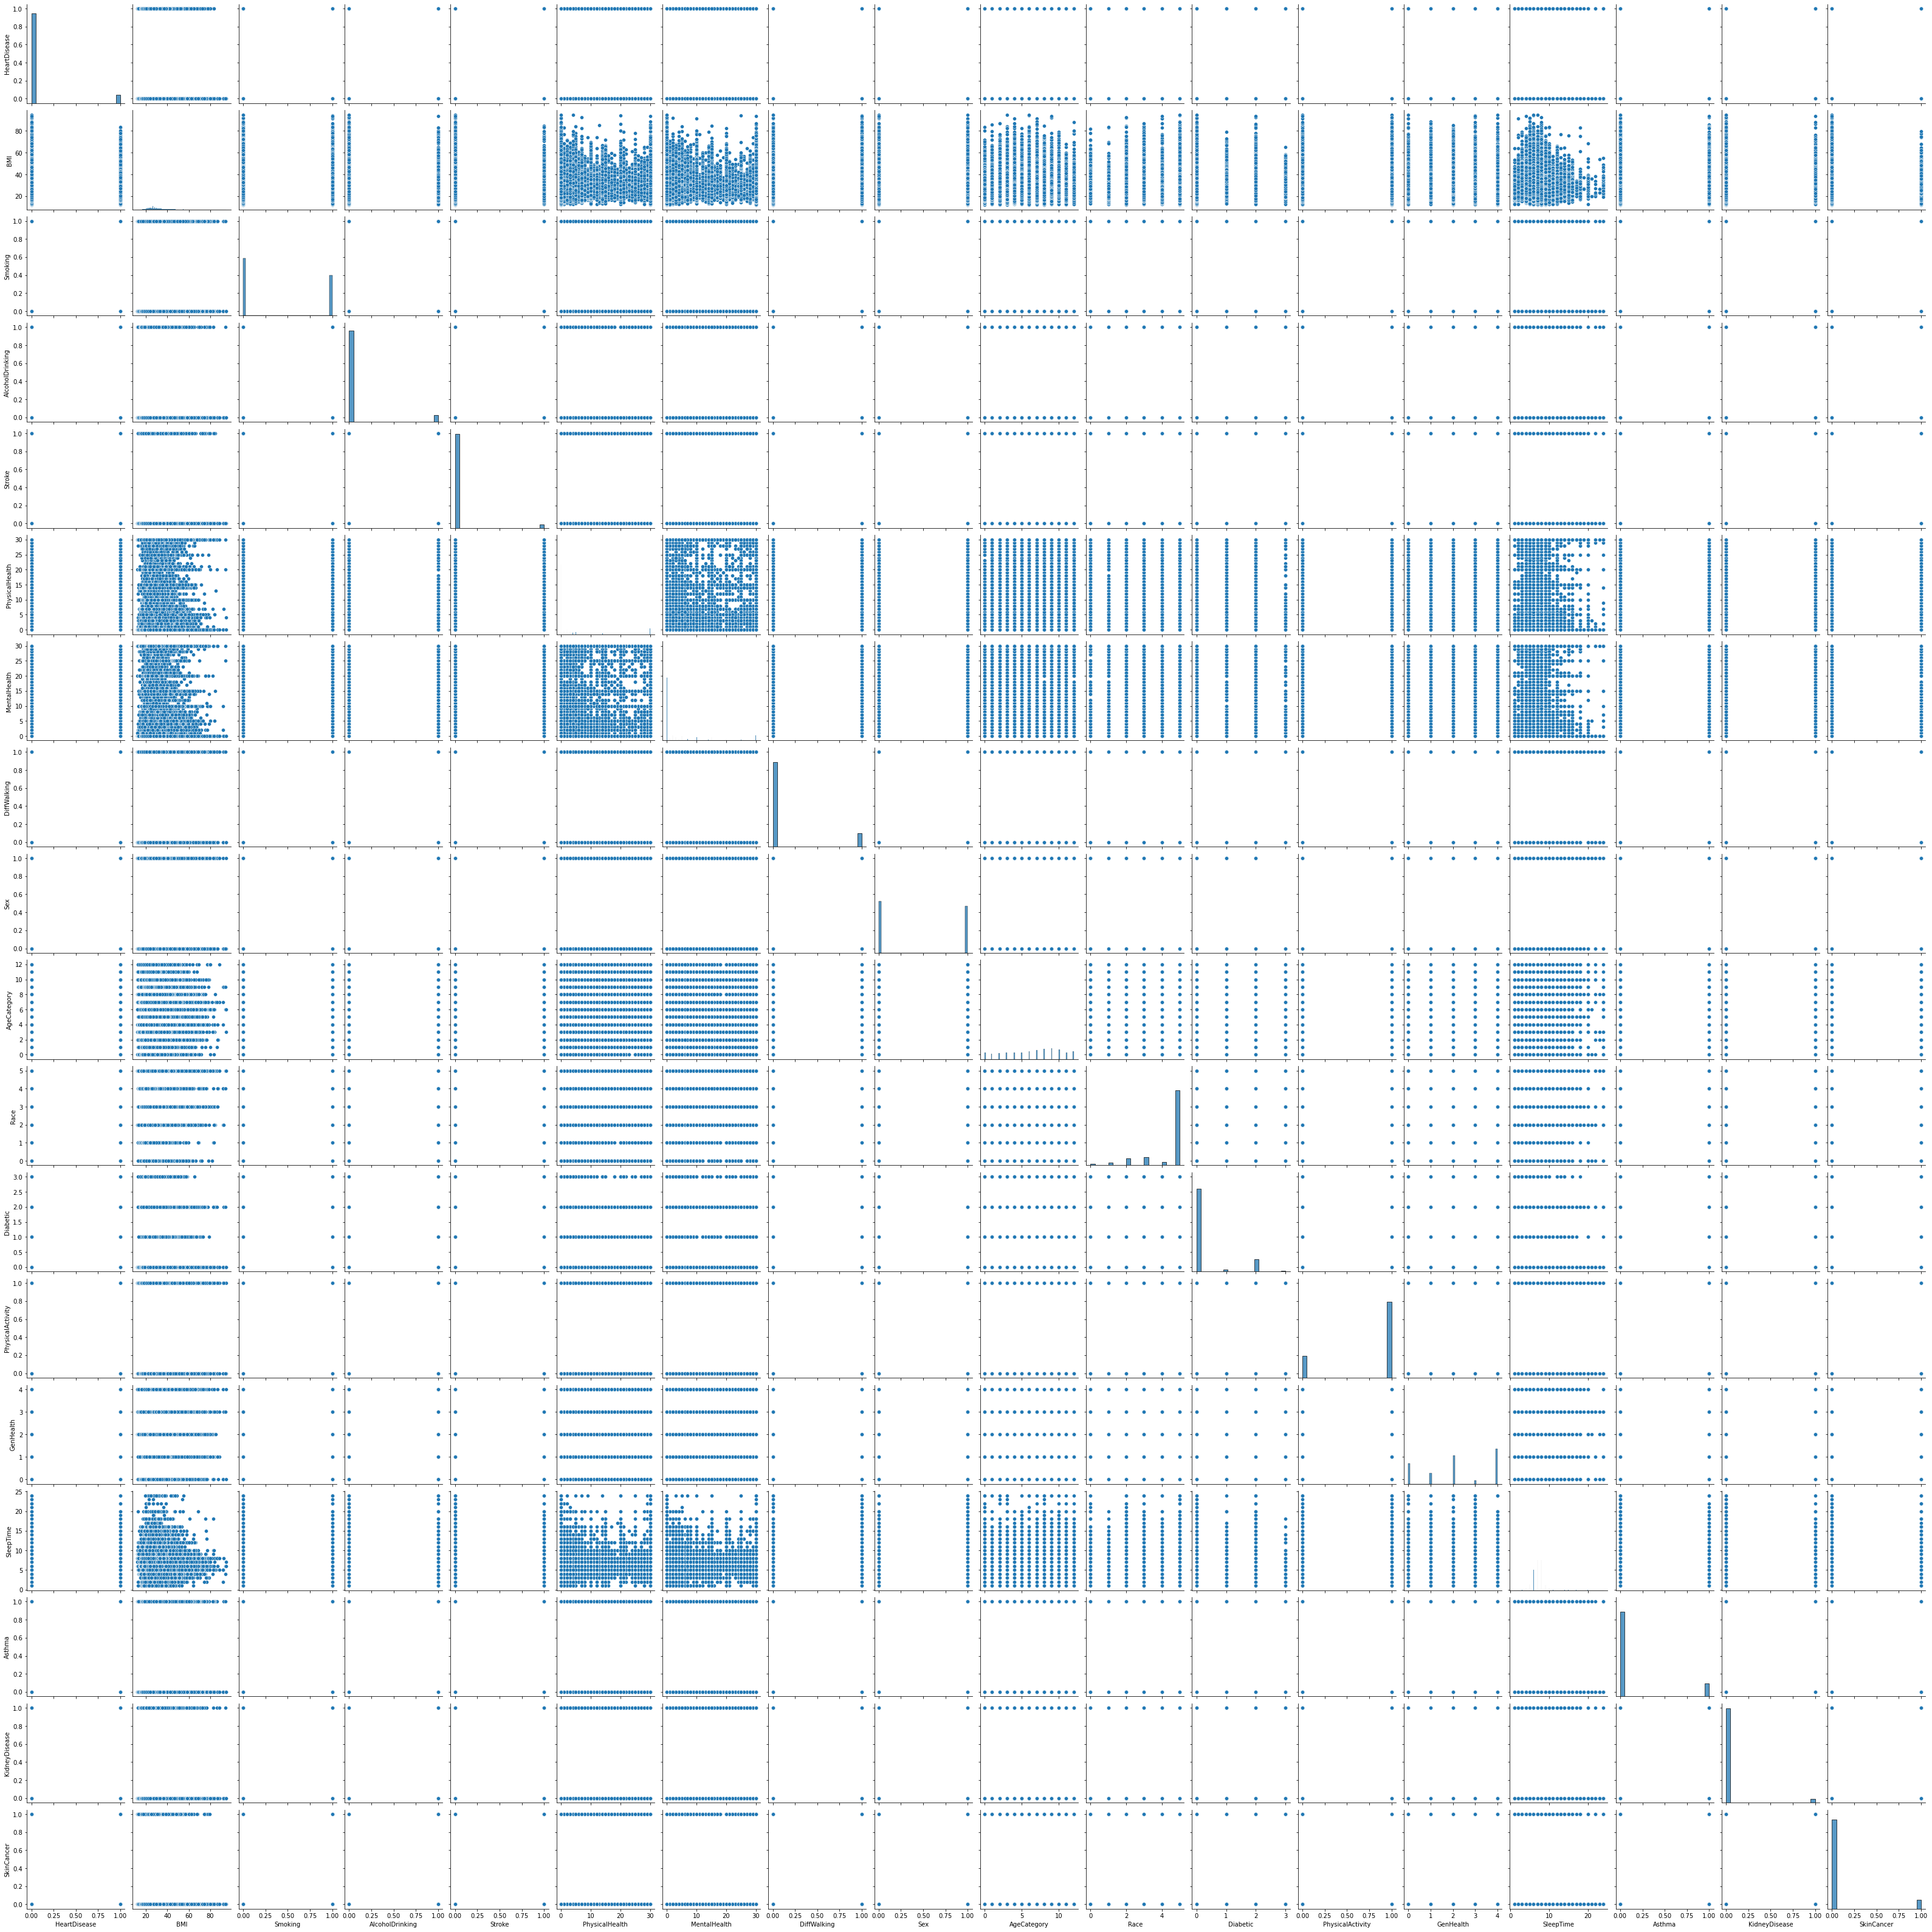

In [ ]:
sns.pairplot(df)
plt.show()

most of the variables have 1 or 0 type values so due to that reason most of the graphs in paitplot got only 4 points plot

VISUALIZATION BETWEEN PREDICTOR AND TARGET VARIABLE

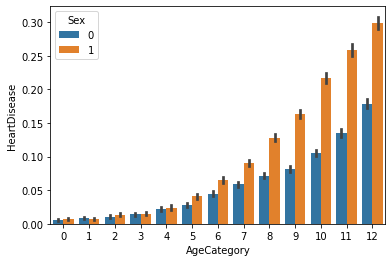

In [ ]:
sns.barplot(y='HeartDisease',x='AgeCategory',hue='Sex',data=df)

in this datset the age group have 13 different classes in which 
40-44,45-49,........,70-74,75-79,80 and above ,are the classes with the difference of 5 between each.
obseravtion ->80 and above people have more heart disease.
   2nd ->75-79 age group people

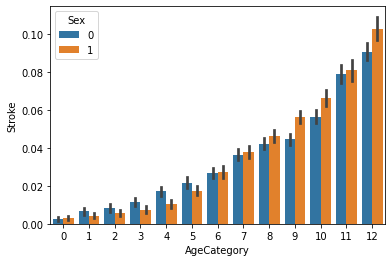

In [ ]:
sns.barplot(y='Stroke',x='AgeCategory',hue='Sex',data=df)

obseravtion ->most of the strokes are also high below age
     1)80 and above men and women have more strokes.
     2)75-79 men and women have same 
     most

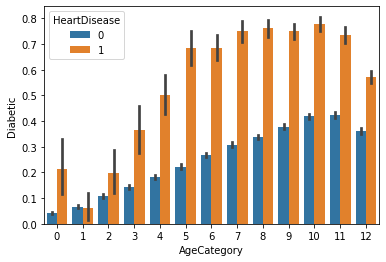

In [ ]:
sns.barplot(y='Diabetic',x='AgeCategory',hue='HeartDisease',data=df)

observation ->
 1) men who are  diabetic people at age 70-74 are having more heart diseases 
 2)women who are diabetic people at age 75-79 have more heart dieaseses 

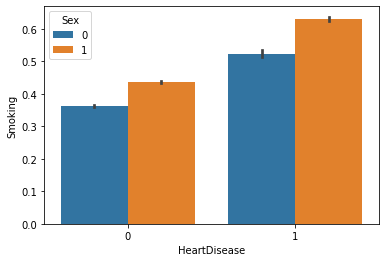

In [ ]:
sns.barplot(x='HeartDisease',y='Smoking',hue='Sex',data=df)

observation->
       in smoking also most of the men are able to get more heart disease

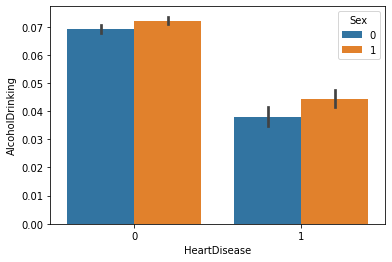

In [ ]:
sns.barplot(x='HeartDisease',y='AlcoholDrinking',hue='Sex',data=df)

observation 
      ->in drinking alochol also most of the men are getting heart disease 

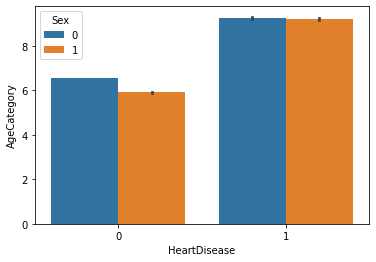

In [ ]:
sns.barplot(x='HeartDisease',y='AgeCategory',hue='Sex',data=df)

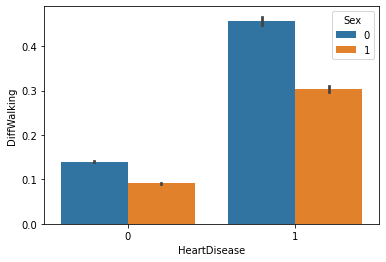

In [ ]:
sns.barplot(x='HeartDisease',y='DiffWalking',hue='Sex',data=df)

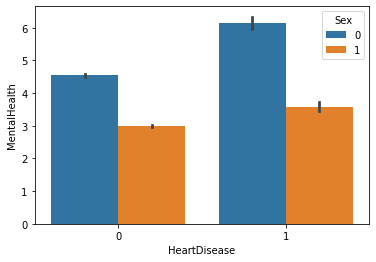

In [ ]:
sns.barplot(x='HeartDisease',y='MentalHealth',hue='Sex',data=df)

observation:
      -> but in mentalhealth women are getting more heart diseases

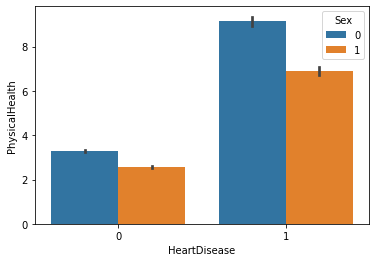

In [ ]:
sns.barplot(x='HeartDisease',y='PhysicalHealth',hue='Sex',data=df)

observation:
      -> but in PhysicalHealth women are getting more heart diseases

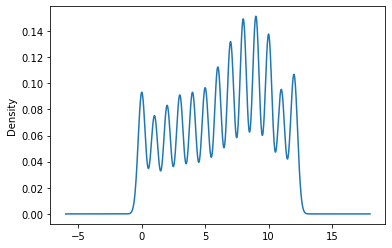

In [ ]:
df.AgeCategory.plot.density()

observation:
       in this dataset age groups of 65 to 80 data is more

MODEL BUILDING

In [ ]:
x = df.iloc[:,1:19]
y = df.iloc[:,0:1]

In [ ]:
x=np.array(df[['BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth'	,'DiffWalking','Sex','AgeCategory','Race'	,'Diabetic','PhysicalActivity','GenHealth','SleepTime','Asthma','KidneyDisease','SkinCancer']])

y=np.array(df[['HeartDisease']])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [ ]:
x_train

array([[18.83,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [41.96,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [20.55,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [42.93,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [31.87,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [28.48,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [ ]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


In [ ]:
print("Predicted value for training data:",model.score(x_train,y_train))
print("Training accuracy:",model.score(x_train,y_train)*100)

Predicted value for training data: 0.9150659352440855
Training accuracy: 91.50659352440856


In [ ]:
print("Predicted value for testing data:",model.score(x_test,y_test))
print("Testing accuracy:",model.score(x_test,y_test)*100)

Predicted value for testing data: 0.9144039441728599
Testing accuracy: 91.44039441728599


In [ ]:
accuracy=model.score(x,y)*100
print(accuracy)

91.48673368876938


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[86945   773]
 [ 7439   782]]


0.9144039441728599